Question 1

A Classification Decision Tree is a machine learning algorithm used to classify dataset and predict a categorical output. Each node in the tree represents a split into subsets based on a feature. At the leaf nodes, the final class label is assigned. An example of real-world applications of classification decision tree would be spam email detection where email will be classified based on subject line or other features. The classification decision tree, predictions are made by following a series of splits in the data, each based on a feature and a decision criterion. In contrast, in multiple linear regression, predictions are made through a linear combination of the input features, weighted by coefficients that represent the strength of each feature's influence on the predicted outcome.

Question 2

Classifying whether a transaction is fraudulent or not: Accurancy measures the general performance on correct predictions among all predications made. It is an useful metric for situation where the amount of true positives and true negatives are equally likely to occur, which in this case would be fraudulent vs. non-fraudulent.

Medical diagnosis of a disease: Sensitivity measures the proportion of actual positives that the model identified correctly. It is a crucial metric for this situation because the consequence of missing an actual positive (missing the detection of disease) is serve. Therefore, minimizing false negatives is the primary aim.

Screening for a non-disease condition: Specificity measures the proportion of actual negatives that the model identified correctly. It is useful for minimizing false positive and to aviod unnecessary treatment in this case.

Email spam detection: Precision measures the proportion of positive predictions that are actually correct. It concerns the reliability of positives in the group that is predicted to be positive instead of the group that is actually negative, like specificity. So it is the metric to be used when we aim to make sure that positive predictions are correct instead of when we aim to avoid falsely identifying negatives as positives. In the email case, if the system flags an email as spam, we want to make sure it's actually spam.

Summary - Understanding Classification Decision Trees:

We discussed the type of problems that Classification Decision Trees address, which involve predicting categorical outcomes (classification tasks). Real-world applications mentioned included medical diagnosis, customer segmentation, and spam detection.
I explained the distinction between Classification Decision Trees and Multiple Linear Regression. A Classification Decision Tree makes predictions by traversing the tree through a series of sequential decisions based on feature splits, whereas Multiple Linear Regression uses a linear equation involving weighted input features.
Exploring Evaluation Metrics:

We examined four different metrics: Accuracy, Sensitivity, Specificity, and Precision.
For each metric, I provided a suitable real-world scenario and a concise explanation of why that metric is appropriate:
Accuracy: Suitable for balanced datasets, such as classifying fraudulent transactions.
Sensitivity: Important for scenarios where catching true positives is crucial, like medical diagnosis.
Specificity: Used in situations where it's vital to minimize false positives, such as genetic testing.
Precision: Relevant when false positives have a high cost, exemplified by spam email detection.

https://chatgpt.com/share/673c00ec-82a8-8004-95e3-631fd4ae2d96

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None

Descriptive Statistics:
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261

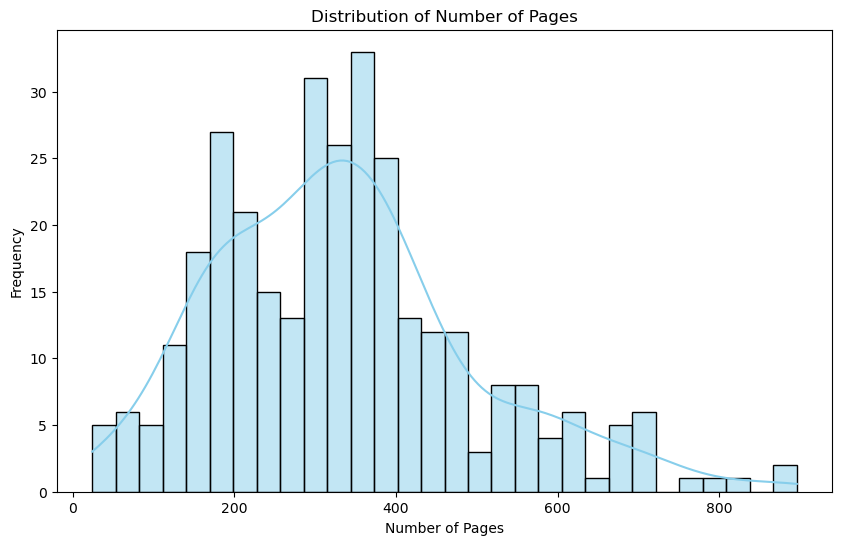

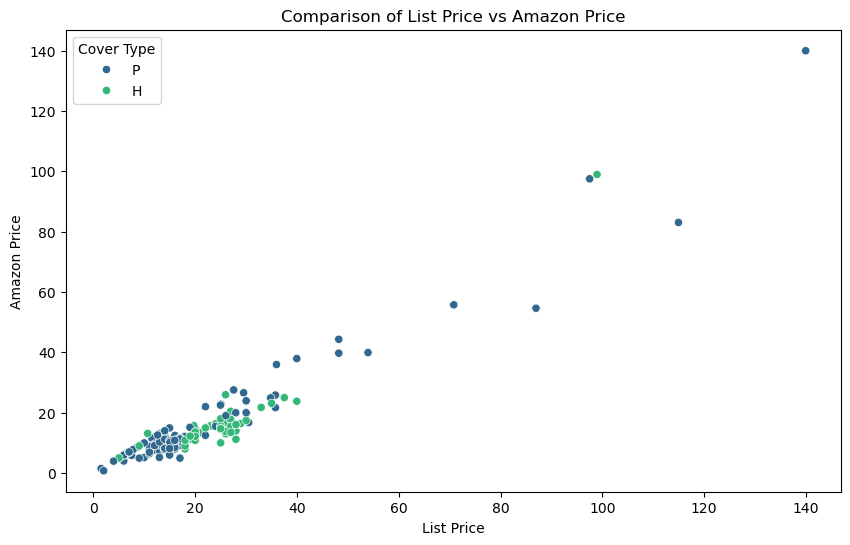

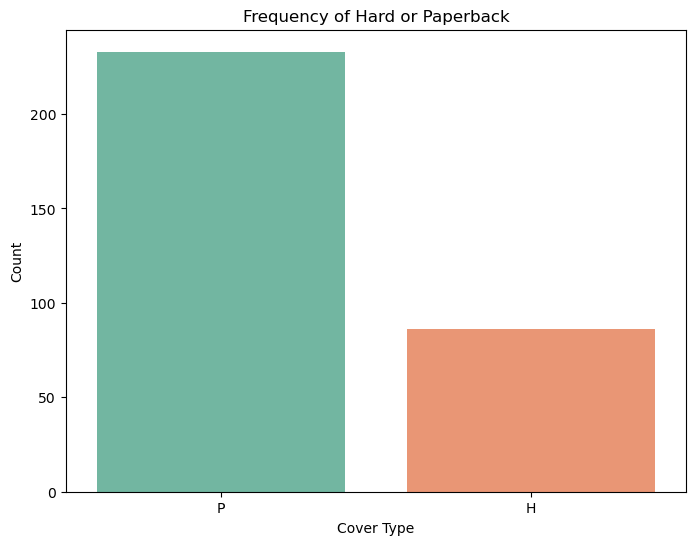

In [11]:
# Question 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove unwanted columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Step 2: Drop rows with any NaN entries in the remaining columns
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Convert data types as specified using .loc
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN.loc[:, 'Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN.loc[:, 'NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN.loc[:, 'Hard_or_Paper'].astype('category')

# Display a summary of the cleaned dataset
print("Dataset Info:")
print(ab_reduced_noNaN.info())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(ab_reduced_noNaN.describe())

# Display first 5 rows of the cleaned dataset
print("\nFirst 5 Rows of the Cleaned Dataset:")
print(ab_reduced_noNaN.head())

# Visualization Section

# 1. Distribution of Number of Pages
plt.figure(figsize=(10, 6))
sns.histplot(ab_reduced_noNaN['NumPages'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

# 2. Comparison of List Price and Amazon Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ab_reduced_noNaN, x='List Price', y='Amazon Price', hue='Hard_or_Paper', palette='viridis')
plt.title('Comparison of List Price vs Amazon Price')
plt.xlabel('List Price')
plt.ylabel('Amazon Price')
plt.legend(title='Cover Type')
plt.show()

# 3. Frequency of Hard or Paperback (Fixed Warning)
plt.figure(figsize=(8, 6))
sns.countplot(data=ab_reduced_noNaN, x='Hard_or_Paper', hue='Hard_or_Paper', palette='Set2', legend=False)
plt.title('Frequency of Hard or Paperback')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()


Number of observations in the training dataset: 255
Number of observations in the test dataset: 64


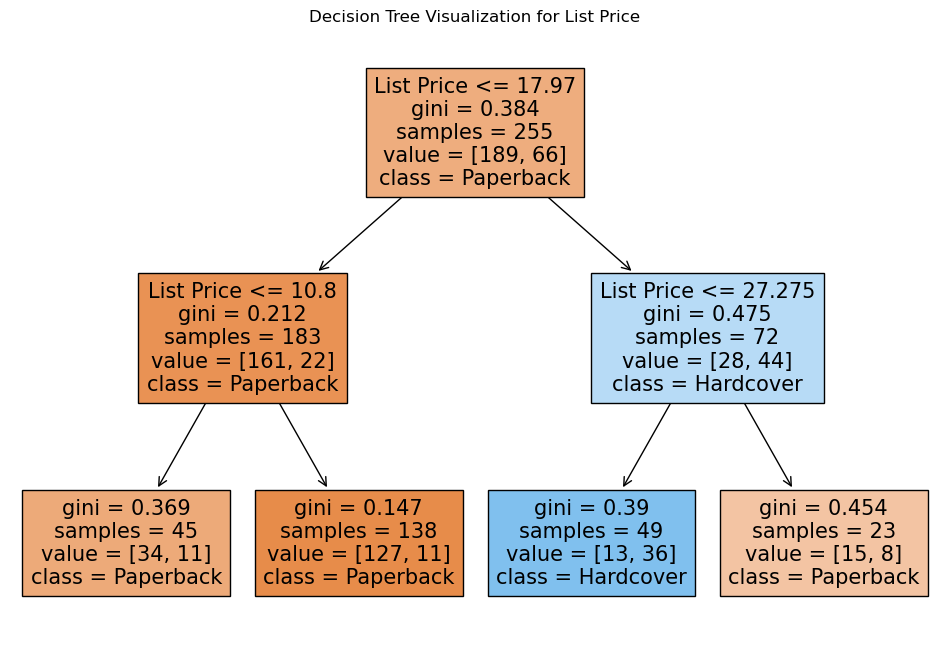

In [13]:
# Question 4

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove unwanted columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Step 2: Drop rows with any NaN entries in the remaining columns
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Convert data types as specified using .loc
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN.loc[:, 'Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN.loc[:, 'NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN.loc[:, 'Hard_or_Paper'].astype('category')

# 80/20 Split of the Data
train_data, test_data = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in training and testing sets
print(f"Number of observations in the training dataset: {len(train_data)}")
print(f"Number of observations in the test dataset: {len(test_data)}")

# Prepare the data for the Decision Tree Classifier
y = pd.get_dummies(train_data["Hard_or_Paper"])['H']  # 1 if Hardcover, 0 if Paperback
X = train_data[['List Price']]

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualization of the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree Visualization for List Price")
plt.show()

Question 4

train_test_split() is used to divide the data, ensuring that 80% goes into training and 20% into testing. This allows the model to learn patterns from the training set and then validate those patterns on unseen data (the test set). .fit(X, y) trains the model to learn the relationship between your input features (List Price) and the target variable (Hard_or_Paper—whether a book is hardcover or paperback). max_depth=2 limits the tree to only split twice. The .predict(X) method allows the trained model to make predictions on new data, checking how well it performs on the test set. tree.plot_tree is used to visualize the decision tree, with nodes displaying the decision criteria based on List Price. The visualization shows how List Price is split at different thresholds to classify whether a book is hardcover or paperback.

Summary - Data Pre-processing:

You started by exploring the Amazon books dataset.
Pre-processing steps included:
Removing the Weight_oz, Width, and Height columns.
Dropping any rows with NaN values.
Adjusting data types: converting Pub year and NumPages to integers and Hard_or_Paper to a categorical type.
Data Visualization:

We visualized the dataset to better understand its structure:
A histogram of the distribution of NumPages.
A scatter plot to compare List Price with Amazon Price based on book type.
A count plot for the frequency of hardcover vs. paperback books, fixing a deprecation warning.
Data Splitting:

You split the cleaned dataset into an 80% training set and a 20% testing set using train_test_split with a fixed random_state for reproducibility.
The sizes of the training and test datasets were reported.
Training a Decision Tree Classifier:

We discussed the purpose of .fit() and .predict() in a DecisionTreeClassifier.
You trained a decision tree using the List Price to predict whether a book was hardcover or paperback.
The decision tree was visualized using tree.plot_tree, illustrating how price thresholds determined predictions.

https://chatgpt.com/share/673c00ec-82a8-8004-95e3-631fd4ae2d96

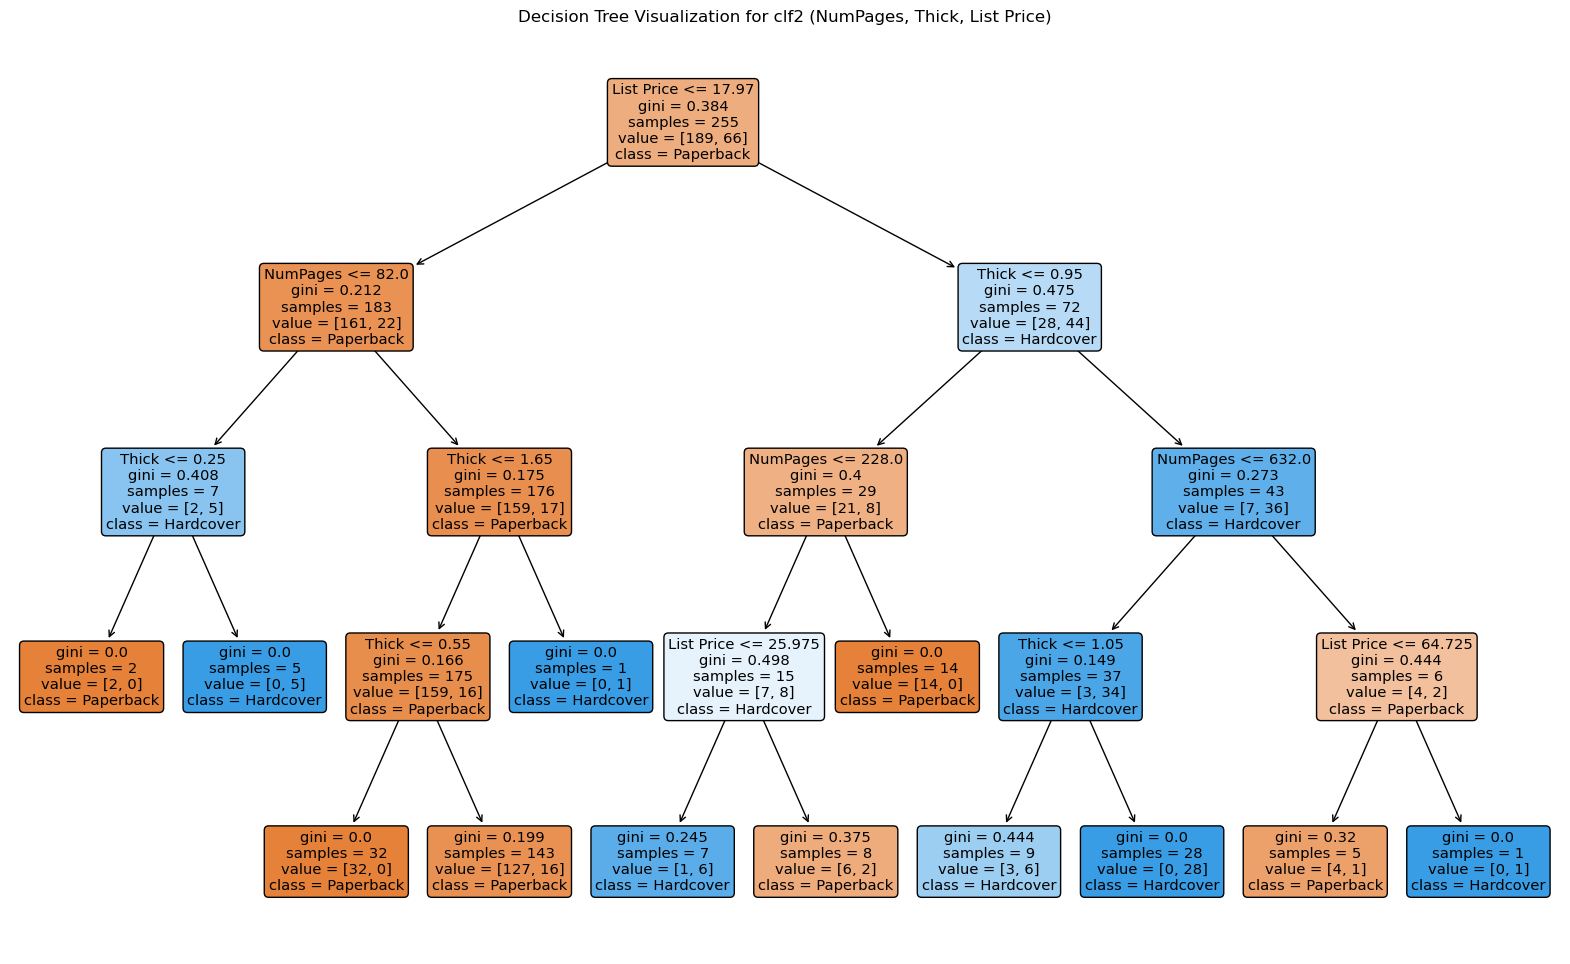

In [14]:
# Question 5

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Reusing the previous dataset split
# X now includes NumPages, Thick, and List Price
X_train = train_data[['NumPages', 'Thick', 'List Price']]
X_test = test_data[['NumPages', 'Thick', 'List Price']]
y_train = pd.get_dummies(train_data["Hard_or_Paper"])['H']
y_test = pd.get_dummies(test_data["Hard_or_Paper"])['H']

# Initialize and train the Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualization using the tree.plot_tree function
plt.figure(figsize=(20, 12))
tree.plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization for clf2 (NumPages, Thick, List Price)")
plt.show()

Question 5

In the clf2 Decision Tree model, predictions are made by evaluating features through a sequence of binary decisions. The model assesses features (e.g., NumPages, Thick, List Price) and splits the data based on set thresholds.
Each internal node represents a decision point, such as: “If NumPages > 300, move to the left branch; otherwise, move to the right.” At the end of the branches, the tree reaches leaf nodes that classify a book as Paperback or Hardcover.
This classification is based on the majority of training samples in that branch, visually represented by color in the decision tree. The model chooses the best splits using metrics like Gini Impurity or Entropy, which measure how “pure” (homogeneous) a node is. A split is selected if it creates subsets that are less mixed (purer), improving the model's predictive power.

Summary - Advanced Decision Tree with Multiple Features:

You expanded the classification task by incorporating more features: NumPages, Thick, and List Price.
A new Decision Tree (clf2) was trained using these features with a deeper tree (max_depth=4).
The visualization provided insight into how the decision-making process changed with the inclusion of additional features.
General Prediction Process Explanation:

I provided an explanation of how predictions are made in the clf2 model, focusing on the decision-making process from node splits to leaf node predictions.
I mentioned the metrics used by decision trees (like Gini Impurity) to determine optimal splits.
Guidance on Optimization:

I introduced the concept of GridSearchCV as a method for finding the optimal hyperparameters (like max_depth) to improve model performance.

https://chatgpt.com/share/673c0f8e-7348-8004-a423-ad410a05171e

Metrics for clf (List Price only):
Sensitivity: 0.7, Specificity: 0.909, Accuracy: 0.844

Metrics for clf2 (NumPages, Thick, List Price):
Sensitivity: 0.75, Specificity: 0.909, Accuracy: 0.859


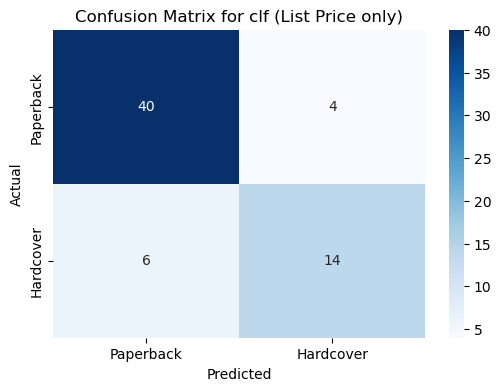

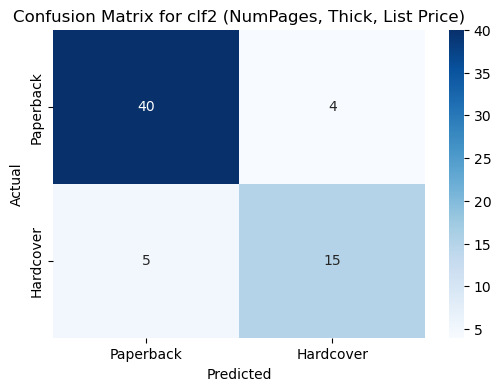

In [21]:
from sklearn.metrics import confusion_matrix

# Predictions for clf and clf2
y_pred_clf = clf.predict(test_data[['List Price']])
X_test = test_data[['NumPages', 'Thick', 'List Price']]
y_pred_clf2 = clf2.predict(X_test)

# Confusion Matrices
y_test = pd.get_dummies(test_data["Hard_or_Paper"])['H']
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Function to calculate metrics
def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    accuracy = (TP + TN) / np.sum(cm)
    return np.round([sensitivity, specificity, accuracy], 3)

# Metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)
print(f"Metrics for clf (List Price only):")
print(f"Sensitivity: {sensitivity_clf}, Specificity: {specificity_clf}, Accuracy: {accuracy_clf}")

# Metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)
print(f"\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Sensitivity: {sensitivity_clf2}, Specificity: {specificity_clf2}, Accuracy: {accuracy_clf2}")

# Visualize confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Paperback', 'Hardcover'], yticklabels=['Paperback', 'Hardcover'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_clf, "Confusion Matrix for clf (List Price only)")
plot_confusion_matrix(cm_clf2, "Confusion Matrix for clf2 (NumPages, Thick, List Price)")


Question 7

The first matrix uses only List Price, which limits the model's ability to distinguish between hardcover and paperback books, while the second matrix includes additional features like NumPages and Thick, allowing the model to capture more nuanced patterns. The confusion matrices for clf and clf2, evaluated on test data, offer a more unbiased measure of model performance, avoiding the overoptimism that can result from evaluating on training data, which may lead to overfitting.

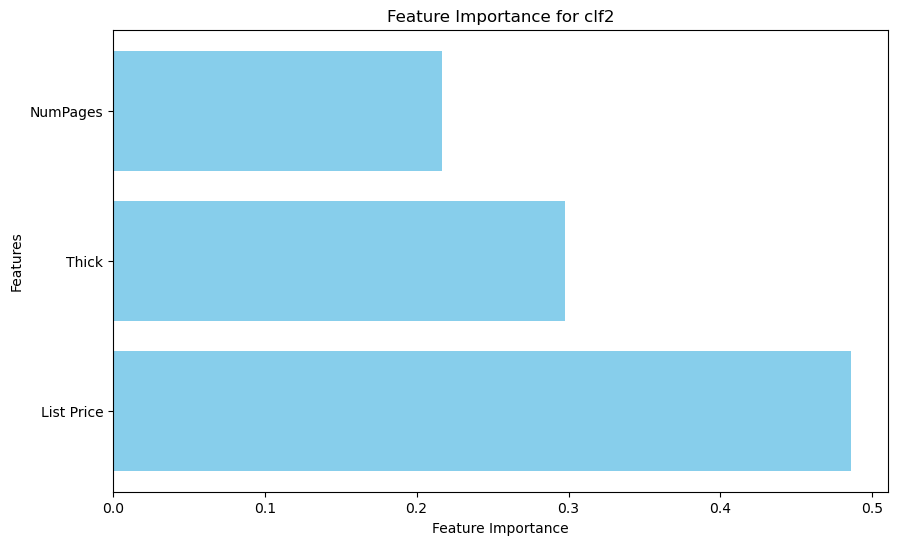

The most important predictor variable is: List Price


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importances and names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Identify the most important feature
most_important_idx = np.argmax(feature_importances)
most_important_feature = feature_names[most_important_idx]

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for clf2')
plt.gca().invert_yaxis()  # Flip the y-axis to have the most important feature on top
plt.show()

# Report the most important feature
print(f"The most important predictor variable is: {most_important_feature}")


Question 9

In linear regression, coefficients quantify the direct effect of each predictor variable on the outcome, indicating how much the dependent variable changes with a one-unit change in a predictor. In decision trees, feature importances represent the relative contribution of each feature to reducing impurity across decision nodes, but they do not directly measure the effect of a one-unit change and are based on the tree's structure and splitting rules.

Summary - Confusion Matrix and Metrics (Question 6):

We generated confusion matrices for clf and clf2 using the test dataset.
Sensitivity, specificity, and accuracy metrics were calculated for both models, demonstrating the improved performance of clf2 due to its use of additional features.
Feature Importances (Question 7):

We explored how to interpret and visualize feature importances for clf2, using .feature_importances_ and .feature_names_in_.
The most important predictor variable was identified and visualized in a horizontal bar chart.
Linear Regression vs. Decision Tree Interpretation:

We discussed how linear regression coefficients represent direct, quantitative contributions to predictions, whereas decision tree feature importances indicate overall heuristic contributions based on impurity reduction across the tree.

https://chatgpt.com/share/673c190b-bdf4-8003-ad9e-9a09b2ab2af6

Question 10

Somewhat